In [6]:
import numpy as np
import random
from classes import RelaxedInstance
from relaxed import *
from time import perf_counter
from matplotlib import pyplot as plt

-- Showing few sample plots for profit calculation over the course of the algorithm --
For 5 workers:


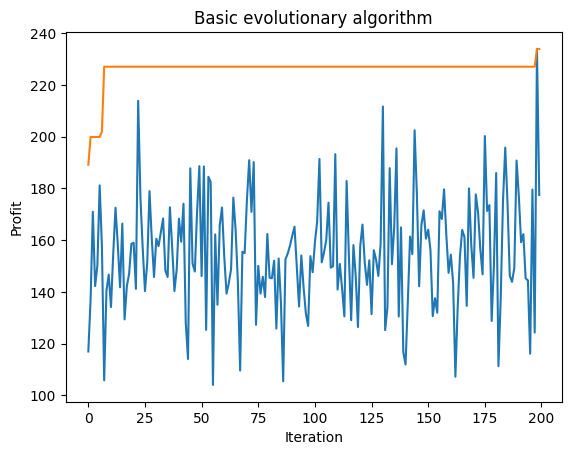

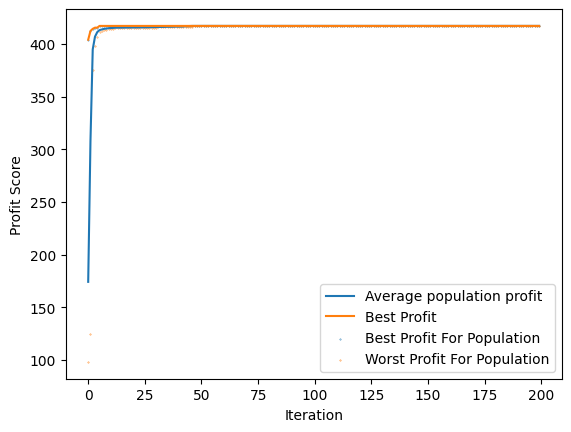

For 10 workers:


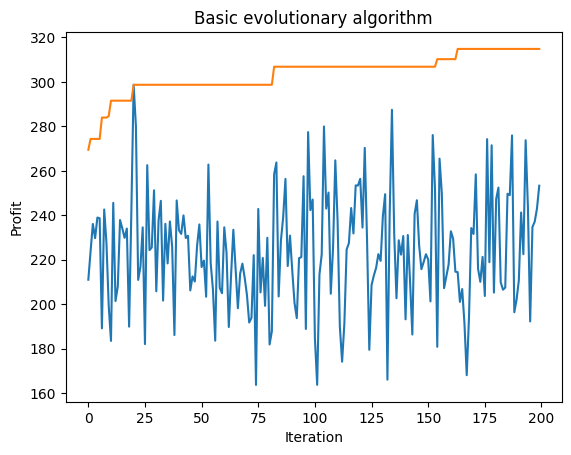

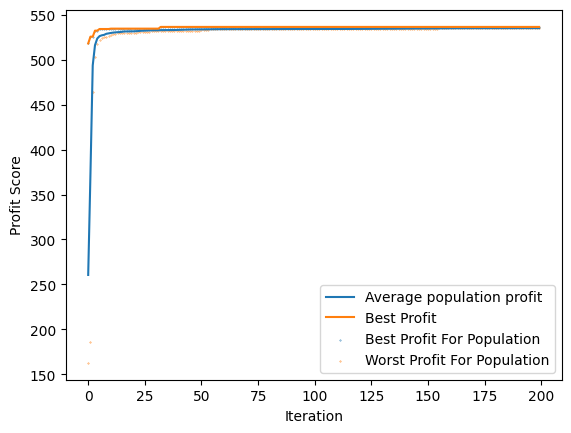

For 15 workers:


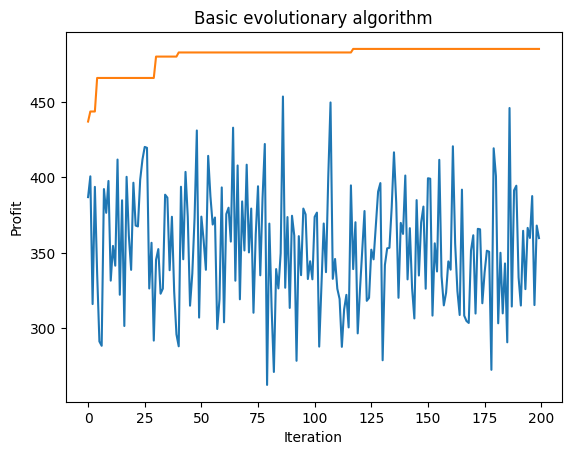

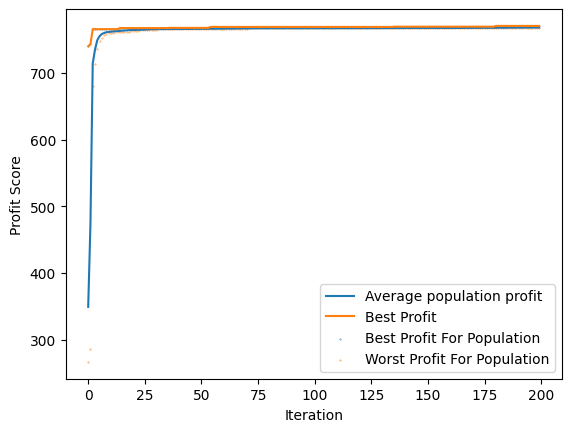

In [7]:
random.seed(42)
np.random.seed(42)

sizes = list(range(5, 20))
profits = []
times = []


#from IPython.display import clear_output
BASE_POPULATION_SIZE = 40
WORKER_COUNT = 10
DEADLINE = 50
TASK_COUNT = 500
MAX_ITER = 200
DEBUG_LOG = False 
print("-- Showing few sample plots for profit calculation over the course of the algorithm --")
for WORKER_COUNT in sizes:
    #clear_output(wait=True)
    #print(f'{WORKER_COUNT - 5} / {len(sizes)}')

    tasks = generateTasks(TASK_COUNT, DEADLINE, 10)

    population = []
    for _ in range(BASE_POPULATION_SIZE):
        task_distrib, _, _ = generateRandomSolution(tasks, WORKER_COUNT)
        population.append(RelaxedInstance(task_distrib))

    to_plot = WORKER_COUNT % 5 == 0
    if to_plot:
        print(f'For {WORKER_COUNT} workers:')

    s = perf_counter()
    base_population = []
    for _ in range(BASE_POPULATION_SIZE):
        base_population.append(generateRandomSolution(tasks, WORKER_COUNT))


    best_profit = 0
    best_distribution = base_population[0]
    profit_list = []
    best_profit_list = []

    for iter in range(MAX_ITER):
        current_population = evolution(base_population, tasks, DEADLINE)

        for current_solution in current_population:
            current_profit = calculate_profit_from_distribution(current_solution[0], tasks)

            if current_profit > best_profit:
                best_profit = current_profit
                best_distribution = current_solution[0]

        profit_list.append(current_profit)
        best_profit_list.append(best_profit)

    x_values = [i for i in range(len(profit_list))]
    if to_plot:
        plt.title(label="Basic evolutionary algorithm")
        plt.plot(x_values, profit_list, label="Current Profit")
        plt.plot(x_values, best_profit_list, label="Current Best Profit")
        plt.xlabel("Iteration")
        plt.ylabel("Profit Score")
        plt.legend()
        plt.show()
    first = best_profit_list[-1]
    tf = perf_counter() - s
    
    ss = perf_counter()
    best, all_instances = evolutionAlg(population, tasks, MAX_ITER, 0.2, quiet=True, plot=to_plot)
    ts = perf_counter() - ss
    second = best.evaluate(tasks)
    profits.append((first, second))
    times.append((tf, ts))



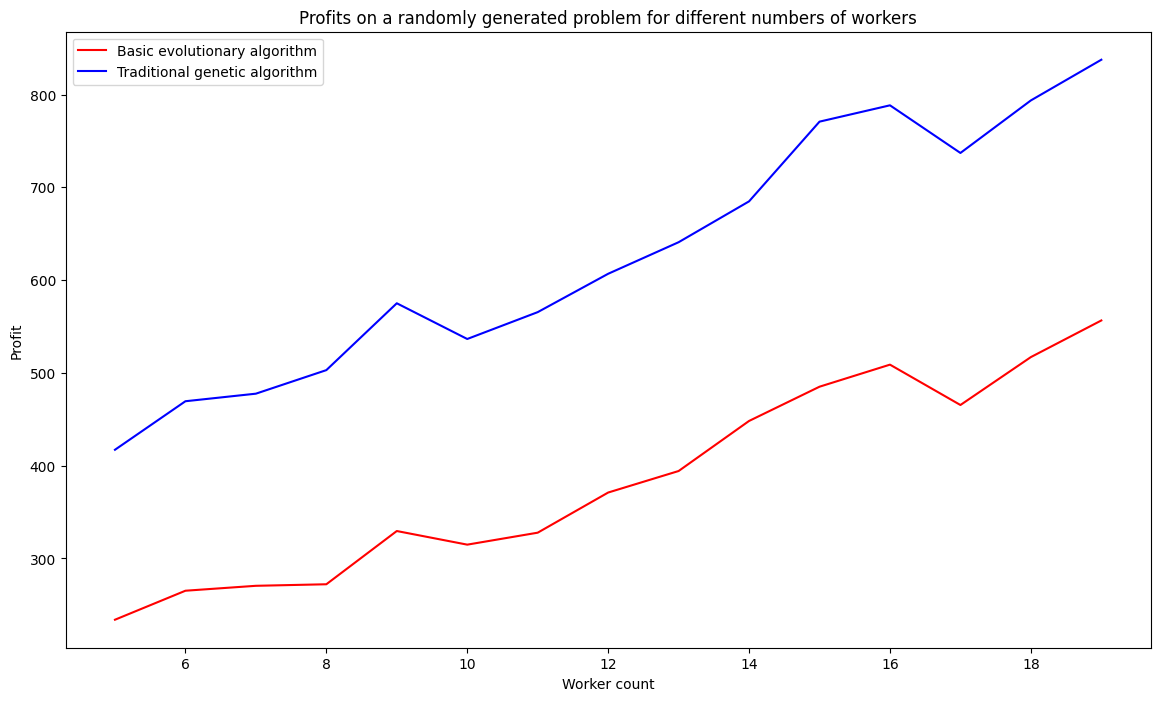

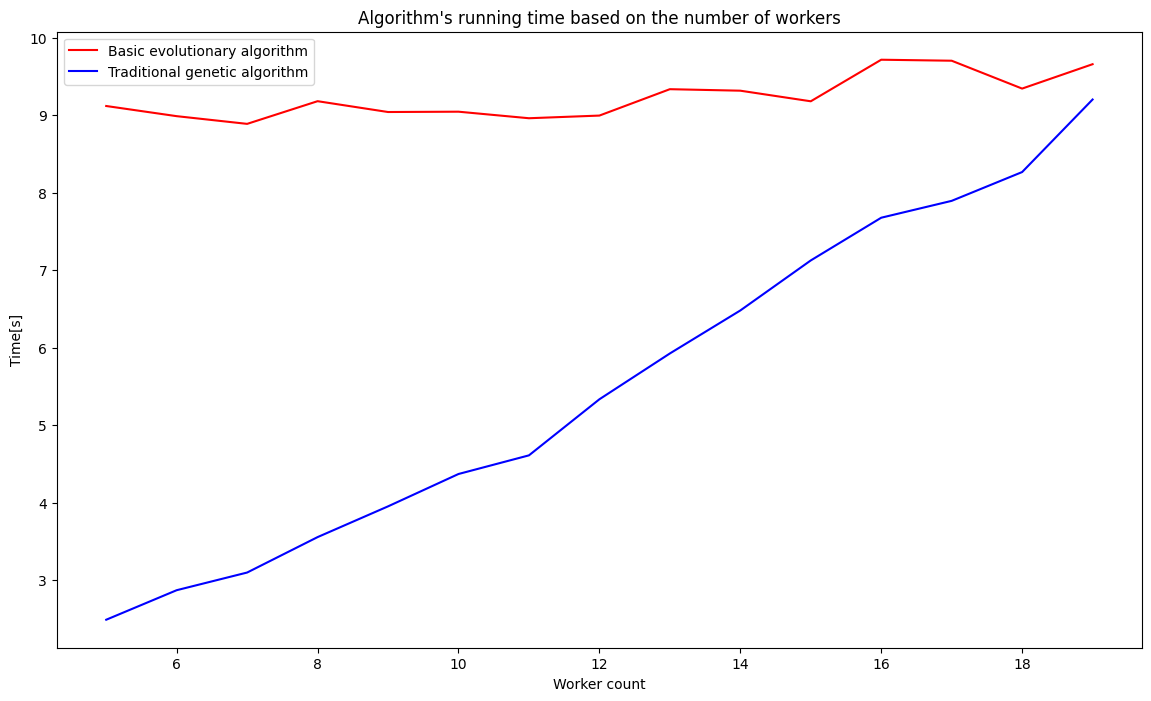

In [8]:
plt.figure(figsize=(14, 8))
plt.title(label="Profits on a randomly generated problem for different numbers of workers")
plt.plot(sizes, list(map(lambda x: x[0], profits)), 'red', label="Basic evolutionary algorithm")
plt.plot(sizes, list(map(lambda x: x[1], profits)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Profit")
plt.show()

plt.figure(figsize=(14, 8))
plt.title(label="Algorithm's running time based on the number of workers")
plt.plot(sizes, list(map(lambda x: x[0], times)), 'red', label="Basic evolutionary algorithm")
plt.plot(sizes, list(map(lambda x: x[1], times)), 'blue', label="Traditional genetic algorithm")
plt.legend()
plt.xlabel("Worker count")
plt.ylabel("Time[s]")
#plt.plot(sizes, list(map(lambda x: x[1], profits)), 'blue')
plt.show()